# Section 1: Introduction to Pandas

## Pandas DataFrames

The DataFrame is the core object of Pandas. It is very similar to the DataFrame in R. It is an extension of a NumPy matrix with more descriptive annotations. Let's dive in.

In [ ]:
from pandas import DataFrame
DataFrame?

## Generating DataFrames

DataFrames can be generated directly from NumPy matrices.

In [2]:
import numpy as np
np.random.seed(47404)

## Simulate random data.
survey = np.random.randint(0, 5, (100, 5))

## Convert to DataFrame.
survey = DataFrame(survey, columns=('Q1','Q2','Q3','Q4','Q5'))

survey.head(5)

,Q1,Q2,Q3,Q4,Q5
0,4,1,3,0,2
1,0,2,4,3,4
2,2,1,0,3,1
3,2,0,1,4,0
4,4,3,3,4,2


DataFrames can also be initialized from dictionaries.

In [3]:
## Initialize dictionary.
survey = dict(Q1 = np.random.randint(0, 5, 100),
              Q2 = np.random.randint(0, 5, 100),
              Q3 = np.random.randint(0, 5, 100),
              Q4 = np.random.randint(0, 5, 100),
              Q5 = np.random.randint(0, 5, 100)
             )

## Convert to DataFrame.
survey = DataFrame(survey)

survey.head(5)

,Q1,Q2,Q3,Q4,Q5
0,1,4,0,2,3
1,4,4,1,0,4
2,2,4,0,2,2
3,0,4,1,4,2
4,2,3,1,1,0


Most importantly, DataFrames can be generated by reading in CSV/Excel files. Here we read in a CSV of choice behavior data from [Tom et al. (2007)](https://www.ncbi.nlm.nih.gov/pubmed/17255512) [data available [here](https://openneuro.org/datasets/ds000005/versions/00001)]. Briefly, this dataset is comprised of the behavior gathered from 16 participants who completed a gambling task (three sessions each).


In [4]:
from pandas import read_csv, read_excel

## Load data from CSV.
data = read_csv('gambles.csv')

data.head(5)

,Subject,Run,Gain,Loss,Choice,RT
0,1,1,10,6,0.0,1.137
1,1,1,10,7,1.0,1.320
2,1,1,10,11,0.0,1.806
3,1,1,10,12,0.0,1.383
4,1,1,10,15,0.0,1.637


## Basic DataFrame Attributes

All DataFrames store basic metadata, including their shape, size, column and row names. 

In [5]:
print(data.shape)
print(data.size)
print(data.index)
print(data.columns)

(4096, 6)
24576
RangeIndex(start=0, stop=4096, step=1)
Index(['Subject', 'Run', 'Gain', 'Loss', 'Choice', 'RT'], dtype='object')


DataFrames support all of the core operations that NumPy arrays do. However, DataFrames do so in an organized fashion for easy describing of data.

In [6]:
data.round();
data.sum();
data.max();
data.min();
data.mean();
data.std();
data.median()

Subject     8.5000
Run         2.0000
Gain       25.0000
Loss       12.5000
Choice      1.0000
RT          1.3525
dtype: float64

In fact, the `DataFrame.agg` method allows for different functions to be applied to different columns.

In [7]:
data.agg({'Choice' : np.mean, 'RT' : np.max})

Choice    0.513952
RT        5.487000
dtype: float64

Certain functions are superbly useful for quick summary statistics, including `DataFrame.describe` and `DataFrame.value_counts`. 

In [8]:
data.Choice.value_counts()

1.0    2026
0.0    1916
Name: Choice, dtype: int64

In [9]:
data.describe()

,Subject,Run,Gain,Loss,Choice,RT
count,4096.000000,4096.000000,4096.00000,4096.000000,3942.000000,3942.000000
mean,8.500000,1.996094,25.00000,12.500000,0.513952,1.446901
std,4.610335,0.817384,9.22067,4.610335,0.499869,0.498300
min,1.000000,1.000000,10.00000,5.000000,0.000000,0.001000
25%,4.750000,1.000000,17.50000,8.750000,0.000000,1.095250
50%,8.500000,2.000000,25.00000,12.500000,1.000000,1.352500
75%,12.250000,3.000000,32.50000,16.250000,1.000000,1.727000
max,16.000000,3.000000,40.00000,20.000000,1.000000,5.487000


Additional useful functions include: **transpose**, **drop_duplicates**, and **fillna.**

In [10]:
data.transpose;          # Tranpose the DataFrame (rows <--> cols)
data.drop_duplicates;    # Remove all duplicate rows from the DataFrame.
data.fillna;             # Fill all NaNs in DataFrame with specified value.

Sorting a DataFrame is achieved with the **sort_values** attribute.

In [11]:
## Sorting by multiple columns.
data.sort_values(['Gain', 'Loss'], ascending=False).head(5)

,Subject,Run,Gain,Loss,Choice,RT
255,1,3,40,20,1.0,0.969
511,2,3,40,20,0.0,2.092
767,3,3,40,20,0.0,0.942
1023,4,3,40,20,0.0,1.204
1279,5,3,40,20,0.0,2.113


DataFrame attributes/functions can be easily piped. That is, it is easy to perform multiple computations in a single line.

In [12]:
## Test for missing (NaN) data.
data.isnull().sum()

Subject      0
Run          0
Gain         0
Loss         0
Choice     154
RT         154
dtype: int64

## Indexing / Modifying DataFrames

With DataFrames, elements can be accessed by row (index), column, or both. A column of a DataFrame can be indexed just like it were a dictionary.

In [13]:
data['RT'].head(5)

0    1.137
1    1.320
2    1.806
3    1.383
4    1.637
Name: RT, dtype: float64

Columns also become attributes of the DataFrame.

In [14]:
data.RT.head(5)

0    1.137
1    1.320
2    1.806
3    1.383
4    1.637
Name: RT, dtype: float64

Multiple columns can be indexed as well.

In [15]:
data[['Choice', 'RT']].head(5)

,Choice,RT
0,0.0,1.137
1,1.0,1.320
2,0.0,1.806
3,0.0,1.383
4,0.0,1.637


The **columns** attribute of a DataFrame can be used to index multiple columns as once.

In [16]:
print(data.columns)
data[ data.columns[::2] ].head(5)

Index(['Subject', 'Run', 'Gain', 'Loss', 'Choice', 'RT'], dtype='object')


,Subject,Gain,Choice
0,1,10,0.0
1,1,10,1.0
2,1,10,0.0
3,1,10,0.0
4,1,10,0.0


Rows can be indexed using `DataFrame.loc` (row name) or `DataFrame.iloc` (row index).

In [17]:
## Version 1
print(data.loc[0])

## Version 2
print(data.iloc[0])

Subject     1.000
Run         1.000
Gain       10.000
Loss        6.000
Choice      0.000
RT          1.137
Name: 0, dtype: float64
Subject     1.000
Run         1.000
Gain       10.000
Loss        6.000
Choice      0.000
RT          1.137
Name: 0, dtype: float64


Using slicing syntax with a DataFrame indexes across multiple rows.

In [18]:
data[:3]

,Subject,Run,Gain,Loss,Choice,RT
0,1,1,10,6,0.0,1.137
1,1,1,10,7,1.0,1.320
2,1,1,10,11,0.0,1.806


The `DataFrame.loc` attribute can also be used to slice by both column and row.

In [19]:
data.loc[[0,1,2], ['Choice', 'RT']]

,Choice,RT
0,0.0,1.137
1,1.0,1.320
2,0.0,1.806


Conditional indexing can also be performed by finding values that meet some criterion. Below we return all rows of the DataFrame where *yankee* is greater than 0.5.

In [20]:
data[data['RT'] > 2 ].head(5)

,Subject,Run,Gain,Loss,Choice,RT
24,1,1,18,14,1.0,2.200
26,1,1,18,20,0.0,2.302
59,1,1,32,16,1.0,2.280
86,1,2,10,9,1.0,2.910
107,1,2,16,17,0.0,2.204


The `DataFrame.query` attribute also allows for powerful conditional indexing.

In [21]:
data.query('RT > 2').head(5)

,Subject,Run,Gain,Loss,Choice,RT
24,1,1,18,14,1.0,2.200
26,1,1,18,20,0.0,2.302
59,1,1,32,16,1.0,2.280
86,1,2,10,9,1.0,2.910
107,1,2,16,17,0.0,2.204


Just as individual elements can be accessed with `DataFrame.loc`, so too can they be modified.

In [22]:
data.loc[0,'Choice'] = 0

New columns are easily added to DataFrames.

In [23]:
## Add column denoting rows with missing data.
data['Missing'] = data.Choice.isnull().astype(int)

data.head(5)

,Subject,Run,Gain,Loss,Choice,RT,Missing
0,1,1,10,6,0.0,1.137,0
1,1,1,10,7,1.0,1.320,0
2,1,1,10,11,0.0,1.806,0
3,1,1,10,12,0.0,1.383,0
4,1,1,10,15,0.0,1.637,0


Similarly, it is easy to drop rows with missing data.

In [24]:
## Check original shape.
print(f'Original shape: {data.shape}')

## Drop missing data.
data = data.dropna()

## Check new shape.
print(f'Original shape: {data.shape}')

Original shape: (4096, 7)
Original shape: (3942, 7)


Particular columns can also be dropped.

In [25]:
## Drop missing data column.
data = data.drop(['Missing'], axis=1)

DataFrames are easily converted back to NumPy arrays and dictionaries.

In [26]:
## To NumPy array.
arr = data.values

## To dictionary.
dd = data.to_dict()

DataFrames can also be easily written to file.

In [ ]:
data.to_csv?

## Combining DataFrames
Combining DataFrames is an obviously important operation. In Pandas, this is achieved in one of three ways:
1. **Append:** add row to existing DataFrame
2. **Concat:** join two or more DataFrames with identical columns
3. **Merge:** join two or more DataFrames with non-overlapping columns based on a specified index.

The ``DataFrame.append`` attribute is used to store new rows to the DataFrame. 

In [28]:
## Make new row.
row = dict(Subject = 17, Run = 1, Choice = 27, RT = -1)

## Append.
data.append(row, ignore_index=True).tail(3)

,Subject,Run,Gain,Loss,Choice,RT
3940,16.0,3.0,40.0,18.0,1.0,1.322
3941,16.0,3.0,40.0,20.0,1.0,1.417
3942,17.0,1.0,NaN,NaN,27.0,-1.000


The **concat** command from pandas can be used to join two DataFrames along their rows. If the DataFrames do not fully share columns, NaNs are used to fill missing data.

In [29]:
from pandas import concat

## Extract Subject 01 data.
df_01 = data.query('Subject == 1')

## Extract Subject 08 data.
df_08 = data.query('Subject == 8')

## Concatenate.
df_0108 = concat([df_01, df_08])

df_0108.Subject.value_counts()

1    255
8    251
Name: Subject, dtype: int64

Finally, the **merge** command can be used to vertically join two DataFrames along some specified index.

In [30]:
## Simulate personality measures.
personality = dict(Subject = np.arange(17)+1,
                   Score = np.random.randint(0,10,17))

## Convert to DataFrame.
personality = DataFrame(personality)
personality.head(5)

,Subject,Score
0,1,6
1,2,6
2,3,0
3,4,2
4,5,6


In [31]:
## Merge with DataFrame.
data.merge(personality, on='Subject').head(5)

,Subject,Run,Gain,Loss,Choice,RT,Score
0,1,1,10,6,0.0,1.137,6
1,1,1,10,7,1.0,1.320,6
2,1,1,10,11,0.0,1.806,6
3,1,1,10,12,0.0,1.383,6
4,1,1,10,15,0.0,1.637,6


## DataFrame Routines

The real power of Pandas is in the number of DataFrame routines that are available. These are efficient functions that efficiently and conveniently reshape/summarize/aggregate data in ways that are helpful for answering research questions and making visualizations. We cover several below.

### ``DataFrame.apply``

``DataFrame.apply`` is similar to ``np.apply_across_axis``, and can be used to apply a command row-wise or column-wise across a DataFrame.

In [32]:
## Define z-score function.
def zscore(arr):
    return (arr - arr.mean()) / arr.std()

## Apply across columns.
data.apply(zscore, axis=0).head(5)    # Apply across columns.

,Subject,Run,Gain,Loss,Choice,RT
0,-1.631134,-1.236947,-1.619177,-1.403582,-1.028175,-0.621917
1,-1.631134,-1.236947,-1.619177,-1.186630,0.972351,-0.254668
2,-1.631134,-1.236947,-1.619177,-0.318823,-1.028175,0.720647
3,-1.631134,-1.236947,-1.619177,-0.101872,-1.028175,-0.128239
4,-1.631134,-1.236947,-1.619177,0.548984,-1.028175,0.381494


### ``DataFrame.GroupBy``

The ``DataFrame.groupby`` command is a simple yet powerful command that allows the user to aggregate, transform, and filter data efficiently. We will provide examples of each in turn.

In [33]:
## GroupBy subject/run.
gb = data.groupby(['Subject','Run'])
gb

#### Aggregation
Aggregation functions compute some summary statistic over groups in the data.

In [34]:
gb.Choice.mean().head(9)

Subject  Run
1        1      0.800000
         2      0.870588
         3      0.882353
2        1      0.321429
         2      0.280488
         3      0.268293
3        1      0.232558
         2      0.285714
         3      0.188235
Name: Choice, dtype: float64

Custom functions can be applied to grouped variables as well.

In [35]:
## Apply z-score within subject/run.
rt = gb.RT.apply(zscore)

GroupBy summaries can be easily turned back into a DataFrame.

In [36]:
gb = gb.Choice.mean().reset_index()
gb.head(5)

,Subject,Run,Choice
0,1,1,0.800000
1,1,2,0.870588
2,1,3,0.882353
3,2,1,0.321429
4,2,2,0.280488


#### Filtration
Filter a dataset accordign to some criterion. Here we will create a new subset of data comprised of only subjects who took the risky bet more than half the time.

In [37]:
## Group by subject.
gb = data.groupby('Subject')

## Filter on responses.
filt = gb.filter(lambda df: df.Choice.mean() > 0.5)

## Identify remaining subjects.
filt['Subject'].unique()

array([ 1,  7,  8, 10, 11, 12, 16])

### ``DataFrame.pivot_table``

Reshape data (produce a "pivot" table) based on column values. Uses unique values from specified index / columns to form axes of the resulting DataFrame.

In [38]:
data.pivot_table(index='Subject', columns='Gain', values='Choice').head(5)

Gain,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40
Subject,,,,,,,,,,,,,,,,
1,0.3125,0.4375,0.437500,0.750000,0.8125,0.933333,0.937500,1.000000,1.000000,1.000000,1.000000,1.0000,1.0000,1.000000,1.000000,1.000000
2,0.0000,0.0625,0.062500,0.125000,0.1875,0.200000,0.333333,0.333333,0.312500,0.312500,0.375000,0.4375,0.5000,0.428571,0.437500,0.600000
3,0.0625,0.0625,0.125000,0.187500,0.1250,0.266667,0.250000,0.250000,0.250000,0.312500,0.250000,0.3125,0.3125,0.312500,0.312500,0.375000
4,0.0000,0.0000,0.000000,0.000000,0.0625,0.200000,0.187500,0.375000,0.312500,0.266667,0.500000,0.3125,0.2500,0.562500,0.400000,0.500000
5,0.0000,0.0000,0.181818,0.166667,0.3000,0.454545,0.307692,0.375000,0.454545,0.454545,0.642857,0.6250,0.6250,0.666667,0.583333,0.666667


In [39]:
data.pivot_table(index='Subject', columns=('Gain','Loss'), values='Choice').head(5)

Gain      10                                               ...   40            \
Loss      5    6    7    8    9    10   11   12   13   14  ...   11   12   13   
Subject                                                    ...                  
1        1.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  1.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
3        1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
5        0.0  NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  NaN   

Gain                                        
Loss      14   15   16   17   18   19   20  
Subject                                     
1        1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2        1.0  NaN  0.0  0.0  0.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4        1.0  0.0  1.0  0.0  0.0  0.0  0.0  
5        1.0  NaN  NaN  0.0  1.0  NaN  0.0  

[5 rows x 256 columns]

### ``DataFrame.melt``

Unpivots a DataFrame from wide format to long format, optionally leaving identifier variables set.

In [40]:
## Create arbitrary pivot table.
table = data.pivot_table(index='Subject', columns='Run', values='RT').reset_index()
table.head(5)

Run,Subject,1,2,3
0,1,1.319059,1.297847,1.402047
1,2,1.864298,1.670488,1.534780
2,3,1.084535,1.212393,1.149024
3,4,1.604506,1.388988,1.426282
4,5,1.511667,1.603568,1.747418


In [41]:
## Melt DataFrame.
melt = table.melt(id_vars='Subject', var_name='Run', value_name='RT')
melt.head(5)

,Subject,Run,RT
0,1,1,1.319059
1,2,1,1.864298
2,3,1,1.084535
3,4,1,1.604506
4,5,1,1.511667


# Section 2: Introduction to Seaborn
The Seaborn statistical data visualization library was created to be the equivalent of ggplot2 for python. In other words, it is designed to rapidly turn around publication-ready plots from Pandas DataFrames with as minimal code as necessary. The [documention](https://seaborn.pydata.org/) is full of great examples that should be checked out. We will go through a few examples here.

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Style and Context
One of the great things about Seaborn is setting defaults. The defaults set a variety of parameters (e.g. colors, fonts, font sizes, etc.) that result in little tweaking of figures down the line. We introduce those two functions here.

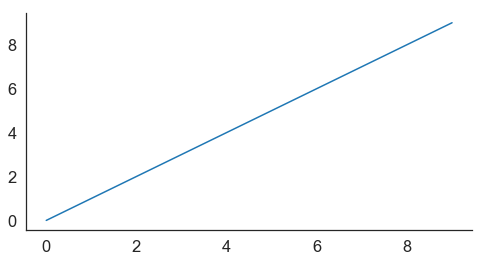

In [43]:
## set_style sets the aesthetic style of the plots. This most dramatically 
## affects the background of plots and the presence (or absence) of gridlines.
sns.set_style('white')      # {white, whitegrid, dark, darkgrid}

## set_context sets the context parameters, affecting the size of labels,
## lines, and other elements of the plot.
sns.set_context('notebook', font_scale=1.5) # {notebook, paper, talk, poster}

## Text plot.
fig = plt.figure(figsize=(8,4))
plt.plot(np.arange(10), np.arange(10));

sns.despine()

### Barplots
Let's first start by recreating the barplot from earlier (i.e. average response within subjects). As can be seen, substantially fewer lines of code are necessary. Moreover, 95% CIs are computed via bootstrap resampling.

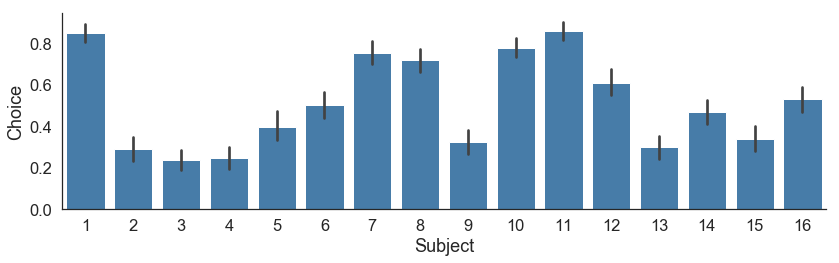

In [44]:
## Initialize figure.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot barplot.
sns.barplot('Subject', 'Choice', data=data, color='#377eb8', ax=ax)

sns.despine()
plt.tight_layout()

### Pointplots / Lineplots

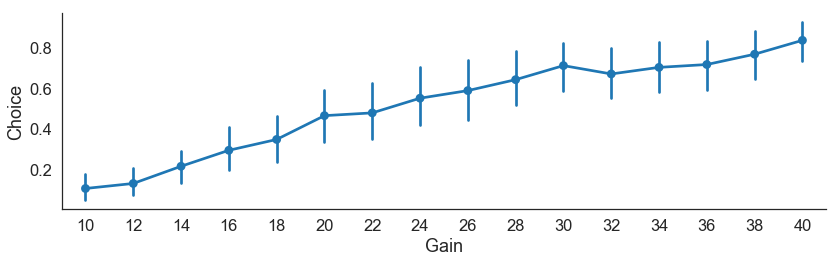

In [45]:
## Initialize figure.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## GroupBy subject/gain.
gb = data.groupby(['Subject','Gain']).Choice.mean().reset_index()

## Plot pointplot.
sns.pointplot('Gain', 'Choice', data=gb, ax=ax)

sns.despine()
plt.tight_layout()

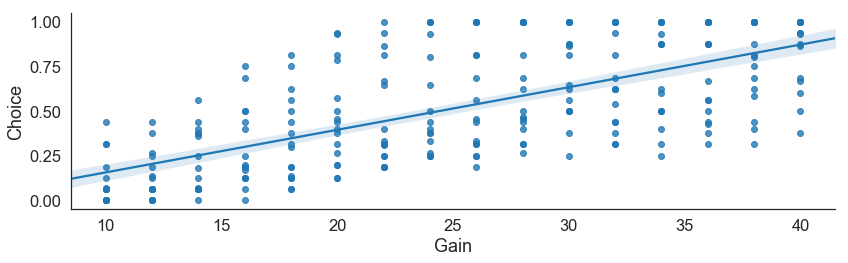

In [46]:
## Initialize figure.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## GroupBy subject/gain.
gb = data.groupby(['Subject','Gain']).Choice.mean().reset_index()

## Plot regression.
sns.regplot('Gain', 'Choice', data=gb, ax=ax)

sns.despine()
plt.tight_layout()

### Distribution Plots

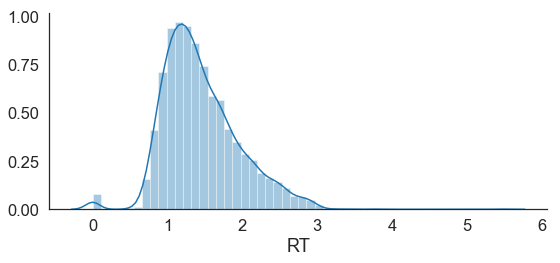

In [47]:
## Initialize figure.
fig, ax = plt.subplots(1,1,figsize=(8,4))

## Plot distribution.
sns.distplot(data.RT, ax=ax)

sns.despine()
plt.tight_layout()

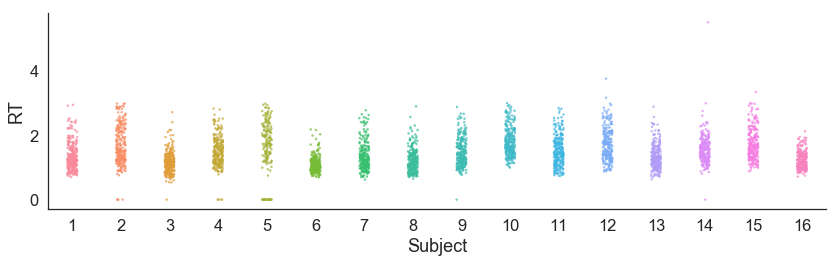

In [48]:
## Initialize figure.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Point stripplot.
sns.stripplot('Subject', 'RT', data=data, size=2.5, alpha=0.7, ax=ax)

sns.despine()
plt.tight_layout()

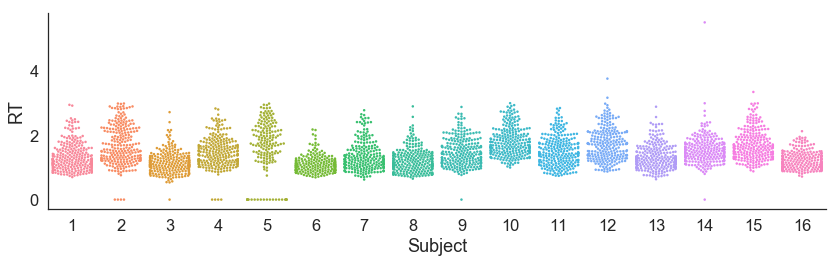

In [49]:
## Initialize figure.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Point stripplot.
sns.swarmplot('Subject', 'RT', data=data, size=2.5, ax=ax)

sns.despine()
plt.tight_layout()

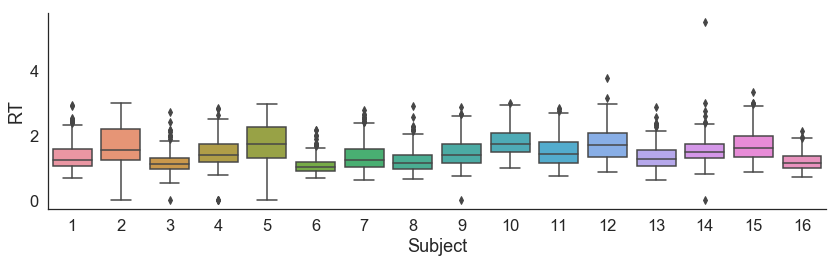

In [50]:
## Initialize figure.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Point stripplot.
sns.boxplot('Subject', 'RT', data=data, ax=ax)

sns.despine()
plt.tight_layout()

### Heatmaps

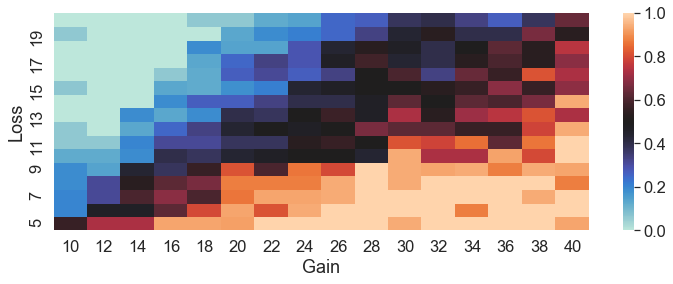

In [51]:
## Initialize figure.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Compute pivot table.
table = data.pivot_table(index='Gain', columns='Loss', values='Choice')

## Plot heatmap.
sns.heatmap(table.T, vmin=0, vmax=1, center=0.5, ax=ax)
ax.invert_yaxis()

### FacetGrid

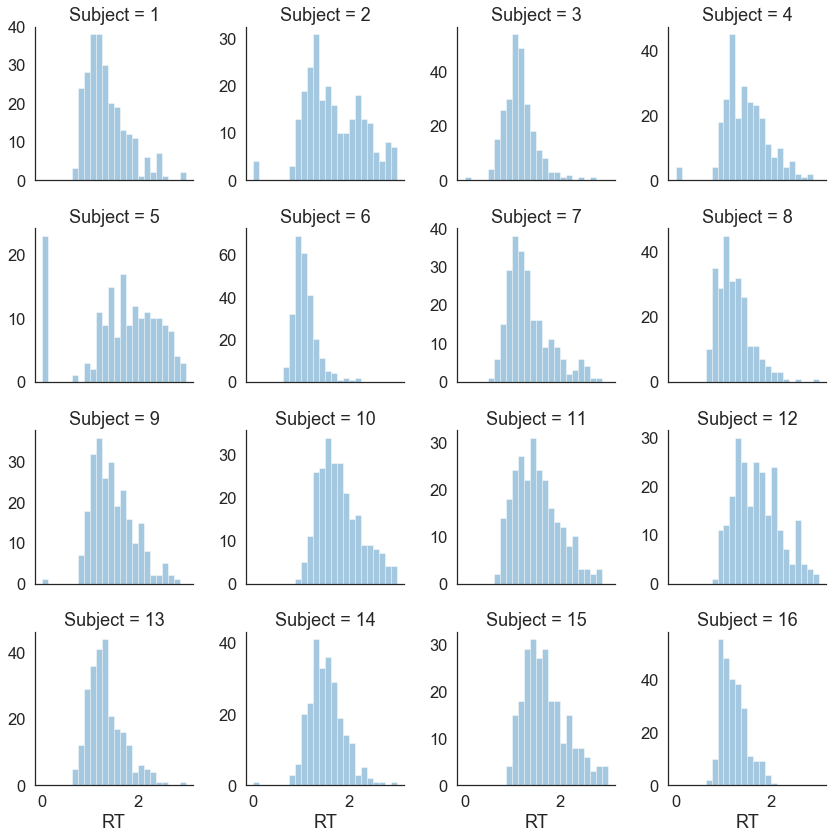

In [52]:
## Initialize canvas.
g = sns.FacetGrid(data, col='Subject', col_wrap=4, sharex=True, sharey=False)

## Plot histograms.
g.map(sns.distplot, 'RT', bins=np.linspace(0,3,25), kde=False);

# Section 3: Introduction to Statistics (SciPy + Statsmodels)

## SciPy Statistics Module
SciPy introduces a series of special modules for different computations, including: integration, optimization, signal and image processing, and statistics. The [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/) details the many powerful tools the package introduces.

The [SciPy stats module](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) (scipy.stats) introduces a number of helpful functions, including:
* Statistical distributions (e.g. normal, student-t, inv-normal, gamma, beta, binomal..., [full list](https://docs.scipy.org/doc/scipy/reference/stats.html))
* Measures of distributional shape (e.g. kurtosis, skew, QQ-plots, KS-test)
* Basic statistical tests (e.g. linear correlation, nonparametric correlation, t-tests, one-way ANOVA, Chi-Square)

The SciPy package can be especially helpful when the user needs to compute quick statistics without necessarily needing to implement even simple models. 


### Basic Statistics
SciPy also has implemented several basic statistical functions for quickly computing statistics:
* Correlations: Pearson correlation (``pearsonr``), Spearman correlation (``spearmanr``), Kendall Tau (``kendalltau``)
* T-tests: one-sample t-test (``ttest_1samp``), two-sample t-test (``ttest_ind``), dependent sample t-test (``ttest_rel``)
* ANOVA: One-way ANOVA (``f_oneway``)
* Chi-square (``chisquare``, ``chi2_contingency``)

We will quickly highlight a few of these functions.

In [53]:
from scipy.stats import pearsonr, ttest_ind
np.random.seed(47404)

## Simulate data from multivariate normal distribution.
## The two variables will be of different mean and r=0.4 correlated.

## Define means / covariances.
mu = [0,2]
cov = [[1.0, 0.4],
       [0.4, 1.0]]

## Randomly sample 50 observations.
x, y = np.random.multivariate_normal(mu, cov, 50).T

## Compute correlation of pairs: (1,2), (1,3)
print('Pearson: r = %0.3f, p = %0.3f' %pearsonr(x, y))

## Compute independent t-tests
print('Independent t-test: t = %0.3f, p = %0.3f' %ttest_ind(x, y))

Pearson: r = 0.461, p = 0.001
Independent t-test: t = -8.558, p = 0.000


## Statsmodels
Statsmodels is the prominent statistical models package in the scientific python distribution. Statsmodels provides functionality for linear regression, generalized linear models, limited dependent variable models, ARMA and VAR models. The [Statsmodels documentation](http://www.statsmodels.org/stable/index.html) provides a full list of models and functions implemented. It draws its inspiration from the most popular R statistics packages (e.g. lme4) and uses the same statistical modeling syntax as R (e.g. "y ~ x"). As we will see, the package is still new and relatively limited as of the time of writing. Though the most basic models are implemented, more complex yet standard models (e.g. mixed-effects logistic regression) are not yet implemented. 


If you are familiar with R-styled formulas for regression, then Statsmodels + Pandas is a very powerful combo of packages for data analysis in python. We will cover only a few select examples, but know that many models are already implemented (e.g. OLS, GLM, GEE, WLS). Many more well-documented tutorials can be found [here](http://www.statsmodels.org/stable/examples/index.html#notebook-examples) and [here](https://github.com/statsmodels/statsmodels/wiki/Examples). 

### Linear Regression (OLS)
Below is a basic ordinary least squares (OLS) linear regression model measuring the relationship of subjective likelihood-of-take (respnum) against gain and loss.

In [54]:
from statsmodels.api import OLS

## Define formula.
formula = 'RT ~ Gain + Loss'

## Define model.
model = OLS.from_formula(formula, data=data)

## Fit model.
result = model.fit()

## Print summary.
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.002    
Dependent Variable: RT               AIC:                5690.9105
Date:               2019-08-20 22:03 BIC:                5709.7488
No. Observations:   3942             Log-Likelihood:     -2842.5  
Df Model:           2                F-statistic:        4.694    
Df Residuals:       3939             Prob (F-statistic): 0.00920  
R-squared:          0.002            Scale:              0.24784  
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept    1.3695     0.0314   43.5673   0.0000    1.3078   1.4311
Gain         0.0005     0.0009    0.6019   0.5473   -0.0012   0.0022
Loss         0.0052     0.0017    3.0082   0.0026    0.0018   0.0085
------------------------------------------------------------------
Omnibus:             457.221       Durbin-Watson:          1.418  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       848.861
Skew:                0.760         Prob(JB):               0.000  
Kurtosis:            4.691         Condition No.:          116    
==================================================================

"""